Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.decomposition import PCA

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Load dataset

In [2]:
# import diabetes.csv as a dataframe
df_diabetes = pd.read_csv('diabetes.csv')

# put column names in a list
col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction',
             'Age']

# remove rows with 0 as values for columns Glucose, BloodPressure, SkinThickness, Insulin, BMI
df_diabetes = df_diabetes[(df_diabetes['Glucose'] != 0) & (df_diabetes['BloodPressure'] != 0) & (
        df_diabetes['SkinThickness'] != 0) & (df_diabetes['Insulin'] != 0) & (df_diabetes['BMI'] != 0)]

# normalize the dataframe
scaler = MinMaxScaler()
df_diabetes[col_names] = scaler.fit_transform(df_diabetes[col_names])

# Separate features and target variable
X = df_diabetes[col_names]  # Features (all columns except the last one)
y = df_diabetes['Outcome']   # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

GridSearch

In [3]:
# Define the parameter grid for grid search
param_grid = {
    'hidden_layer_sizes': [(64,), (32,)],
    'activation': ['relu', 'logistic'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.001, 0.01],
    'max_iter': [100]
}

# Create MLPClassifier
mlp_model = MLPClassifier()

# Create GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(mlp_model, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the model with the best parameters
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/home/joan/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/joan/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/joan/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTA

Best Parameters:  {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (32,), 'max_iter': 100, 'solver': 'lbfgs'}
Best Accuracy:  0.759375


/home/joan/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Evaluate the best model

In [4]:
# Use the best model for further evaluation
best_model = grid_search.best_estimator_

# Evaluate the model
accuracy = best_model.score(X_test, y_test)
print('Test Accuracy:', accuracy)

Test Accuracy: 0.7654320987654321


Plot ROC, CM and print the clss error

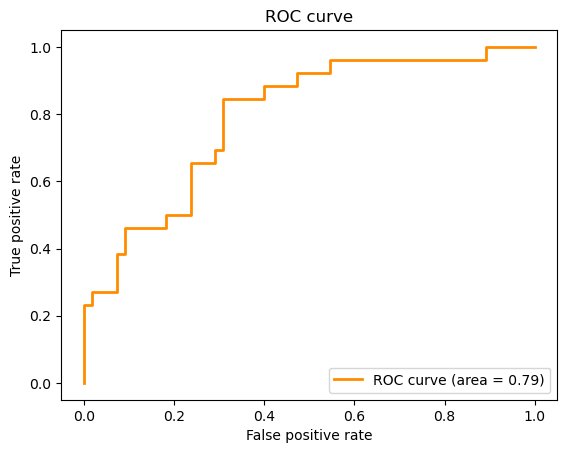

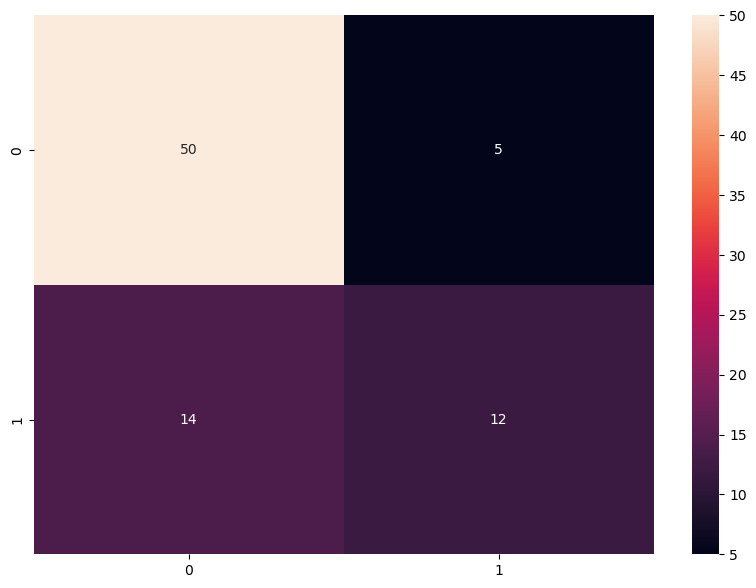

Error rate:  23.45679012345679


In [5]:

# Use the best model for prediction on the test set
y_pred = best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

# Use the best model for prediction on the test set
y_pred = best_model.predict(X_test)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.show()

# Compute classification error percentage
error_rate = 100 * (cm[0, 1] + cm[1, 0]) / (cm[0, 0] + cm[0, 1] + cm[1, 0] + cm[1, 1])
print('Error rate: ', error_rate)

Visualize the data

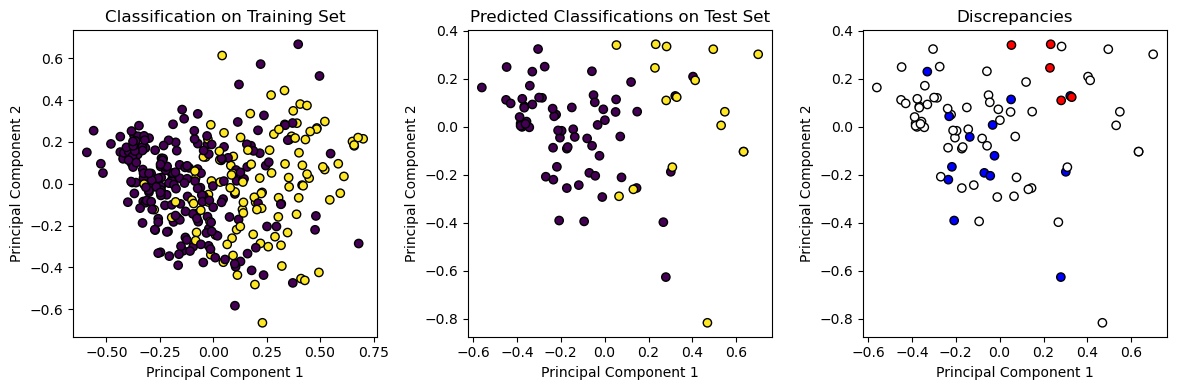

In [6]:
# PCA for dimensionality reduction
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Plot 1: Classification Dynamics on the Training Set
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k')
plt.title('Classification on Training Set')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plot 2: Predicted Classifications on the Test Set
X_test_pca = pca.transform(X_test)
test_pred_pca = pca.transform(X_test)

plt.subplot(1, 3, 2)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='viridis', edgecolor='k')
plt.title('Predicted Classifications on Test Set')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plot 3: Discrepancies between Predicted and True Classifications
discrepancies = y_pred - y_test.values
plt.subplot(1, 3, 3)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=discrepancies, cmap='bwr', edgecolor='k')
plt.title('Discrepancies')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()